# Case Study 1

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
loan = pd.read_csv("loans_full_schema .csv")

In [3]:
loan.shape

(10000, 55)

This dataset comprises thousands of loans made using the Lending Club platform, which allows people to lend money to other people.
The dataset has 10000 observations and 55 features. The number of features is large and the number of observations are less

In [4]:
loan.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [5]:
loan.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


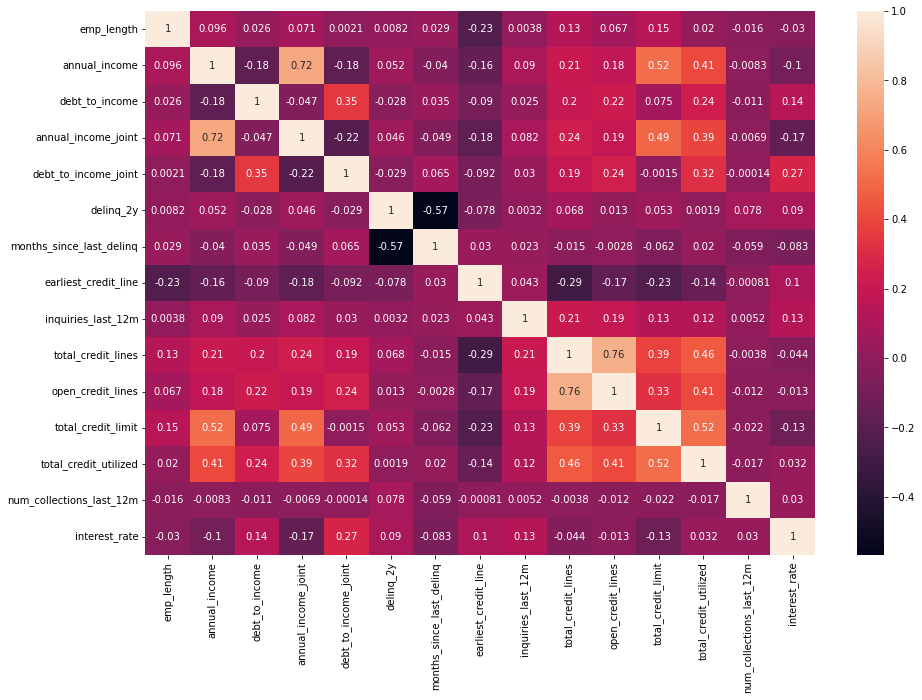

In [6]:
df1 = loan.loc[:,:'num_collections_last_12m']
df_f = loan['interest_rate']
heat1 = pd.concat([df1,df_f],axis = 1)
plt.figure(figsize=(15,10))
sb.heatmap(heat1.corr(),annot=True)
plt.show()

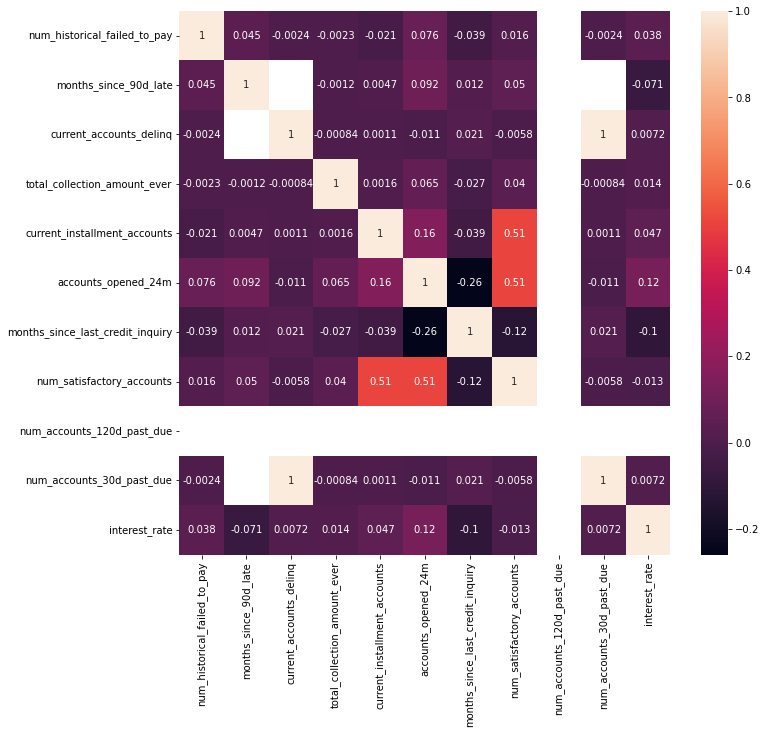

In [7]:
df2 = loan.loc[:,'num_historical_failed_to_pay':'num_accounts_30d_past_due']
heat2 = pd.concat([df2,df_f],axis = 1)
plt.figure(figsize=(11,10))
sb.heatmap(heat2.corr(),annot=True)
plt.show()

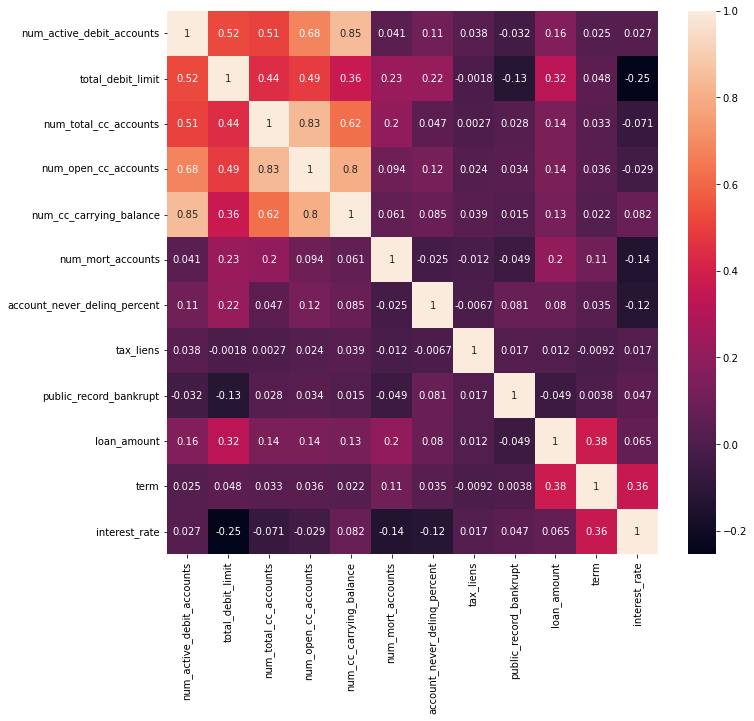

In [8]:
df4 = loan.loc[:,'num_active_debit_accounts':'term']
heat3 = pd.concat([df4,df_f],axis = 1)
plt.figure(figsize=(11,10))
sb.heatmap(heat3.corr(),annot=True)
plt.show()

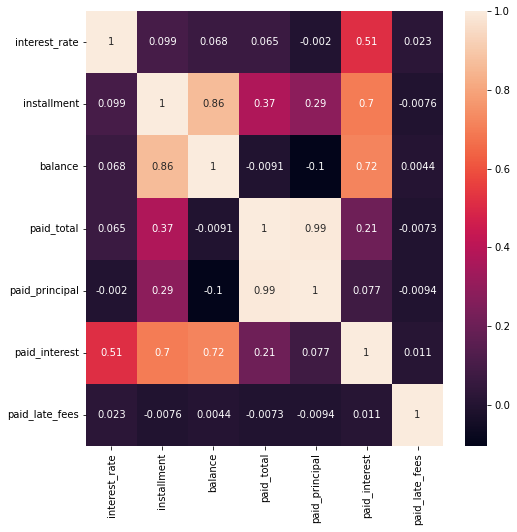

In [9]:
plt.figure(figsize=(8,8))
sb.heatmap(loan.loc[:,'interest_rate':].corr(),annot=True)
plt.show()

In heat maps above we can see correlations of all the variables with respect to interest rate and as we can see almost all the features are positively correlated not not highly correlated.

In [10]:
loan.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [11]:
loan.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

There are many colums with null values.

In [12]:
for i in loan.columns:
    if(loan[i].dtypes == object):
        loan[i] = loan[i].astype('category')

Converting all the features of object type to category

In [13]:
loan = loan.drop(['emp_title','annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_last_delinq','debt_to_income','months_since_90d_late','months_since_last_credit_inquiry','num_accounts_120d_past_due','emp_length'],axis = 1)


dropping the variables with null values.

Other steps we can do is:
- replace the values of joint income with normal income at null values
- replace the other values with mean of the column

In [14]:
loan.dtypes

state                           category
homeownership                   category
annual_income                    float64
verified_income                 category
delinq_2y                          int64
earliest_credit_line               int64
inquiries_last_12m                 int64
total_credit_lines                 int64
open_credit_lines                  int64
total_credit_limit                 int64
total_credit_utilized              int64
num_collections_last_12m           int64
num_historical_failed_to_pay       int64
current_accounts_delinq            int64
total_collection_amount_ever       int64
current_installment_accounts       int64
accounts_opened_24m                int64
num_satisfactory_accounts          int64
num_accounts_30d_past_due          int64
num_active_debit_accounts          int64
total_debit_limit                  int64
num_total_cc_accounts              int64
num_open_cc_accounts               int64
num_cc_carrying_balance            int64
num_mort_account

### Data Visualizations

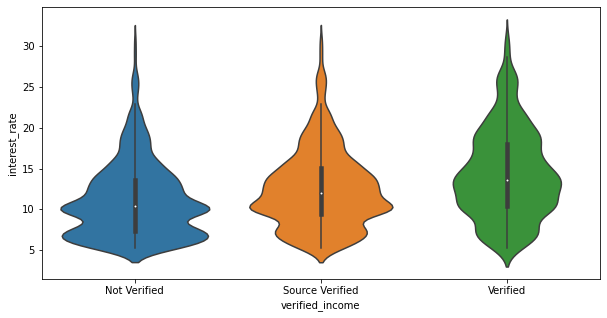

In [15]:
plt.figure(figsize=(10,5))
sb.violinplot(x = loan['verified_income'],y=loan['interest_rate'])
plt.show()

Here we can see the distribution of verified income and interest rate, this is an interesting observation because the average interest rate of not verified income is lower than the average rate of verified and source verified.

  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)


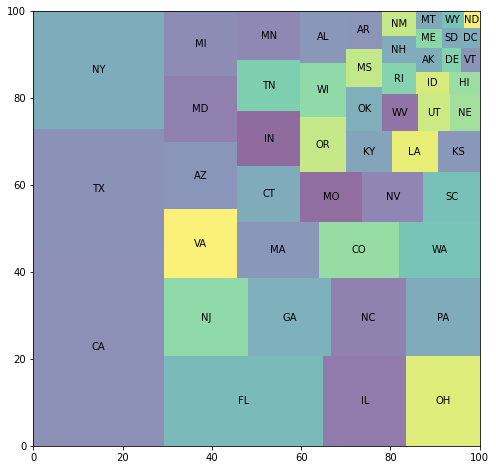

In [16]:

import squarify 

st = loan['state'].value_counts()
plt.figure(figsize=(8,8))
squarify.plot(sizes=st, label=st.index, alpha=0.6 )
plt.show()

This is a tree map which explains the number of candidates from each state we can see that the number of people from california are more than any other state.

/Users/bhadrashah/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


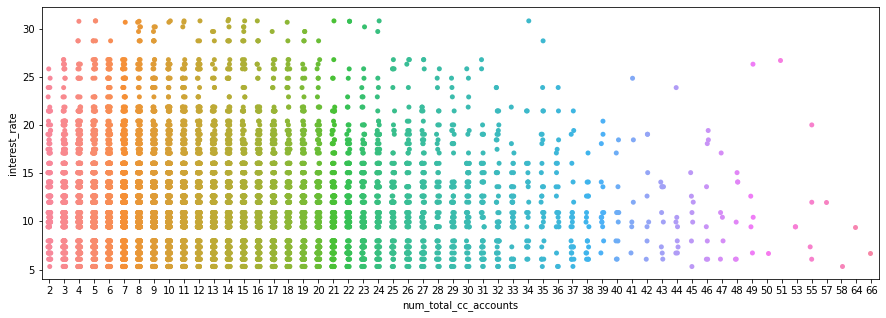

In [17]:
plt.figure(figsize=(15,5))
sb.stripplot(loan['num_total_cc_accounts'],loan['interest_rate'])
plt.show()


This plot shows the interest rate w.r.t to the number of credit account a person holds, we can infer that credit account does not effect the interest rate.

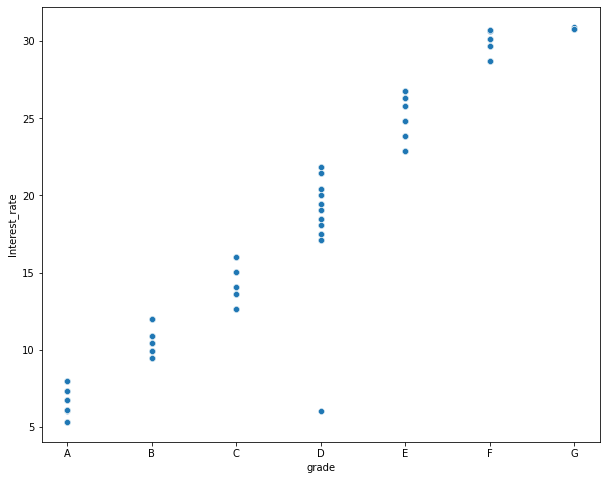

In [18]:
plt.figure(figsize=(10,8))
sb.scatterplot(x=loan['grade'],y=loan['interest_rate'])
plt.xlabel('grade')
plt.ylabel('Interest_rate')
plt.show()

Depending on the grade the interest rate is clearly increasing 

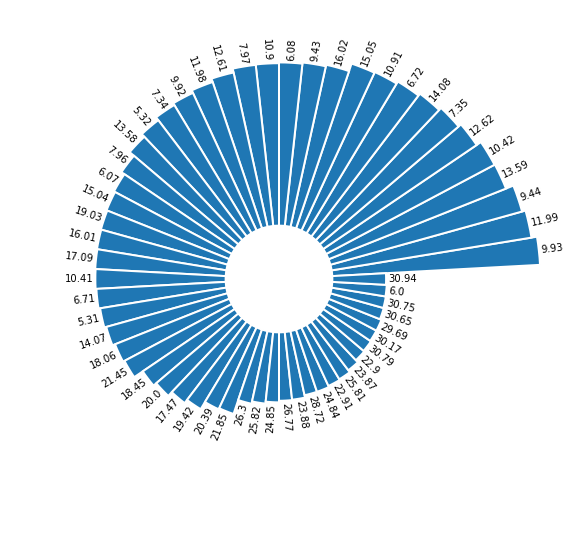

In [19]:
import numpy as np
int_rate = loan['interest_rate'].value_counts()
int_rate = int_rate.reset_index()

plt.figure(figsize=(20,10))


ax = plt.subplot(111, polar=True)


plt.axis('off')


upperLimit = 300
lowerLimit = 100


max = int_rate['interest_rate'].max()

slope = (max - lowerLimit) / max
heights = slope * int_rate.interest_rate + lowerLimit


width = 2*np.pi / len(int_rate.index)


indexes = list(range(1, len(int_rate.index)+1))
angles = [element * width for element in indexes]
angles


bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")


labelPadding = 4


for bar, angle, height, label in zip(bars,angles, heights, int_rate["index"]):

    
    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

 
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

This plot shows the count of people with repective to interest rate , we can see majority of people have interest rates between 7.5 to 15

In [20]:
# one hot encoding for categorical variables
loan = pd.get_dummies(loan)

In [21]:
# shuffling the data
loan =  loan.sample(frac=1)

For data cleaning I performed one hot encoding on all the categorial feature. 
I also checked for null values and drop the rows with null values

### Creating feature set

In [22]:
# Taking the target variable 
Y = loan['interest_rate']
loan = loan.drop('interest_rate',axis = 1)

In [23]:
# splitting the data for train and test 
x_train = loan[:8000]
x_test = loan[8001:]
y_train = Y[:8000]
y_test = Y[8001:]

### Linear Regression

In [423]:
lin = LinearRegression().fit(x_train, y_train)

As we saw that features are not highly correlated, so we are using linear regression.

In [424]:
prid = lin.predict(x_test)
prid

array([ 9.90724112, 21.61791799, 21.56860581, ..., 10.4117166 ,
        7.96862073, 14.06116833])

In [425]:
y_test

1802     9.93
5296    21.45
9250    21.45
6499    13.58
227     14.07
        ...  
2077    14.08
7384    17.09
1728    10.42
5151     7.96
737     14.08
Name: interest_rate, Length: 1999, dtype: float64

In [426]:
err = mean_squared_error(y_test,prid)
print(err)

0.08025386440943062


Mean squared error , this value is  less meaning the model is predicting the values very well 

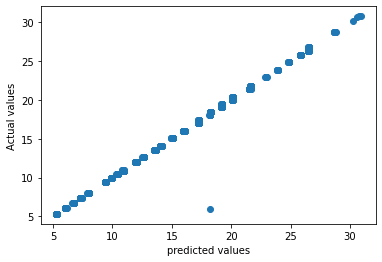

In [427]:
plt.scatter(prid,y_test)
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.show()

This plot is very similar to x=y line which suggests that our predicted values are very similar to actual values 

### Neural Network

In [24]:
from keras import models
from keras import layers



model = models.Sequential()
model.add(layers.Dense(units= 100,activation='linear',input_dim=x_train.shape[1]))
model.add(layers.Dense(units= 100,activation='linear'))
model.add(layers.Dense(units= 100,activation='tanh'))
model.add(layers.Dense(1, activation='relu'))

model.compile(optimizer= 'adam', loss='mean_squared_error', metrics=['mse'])



Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1


2022-04-12 09:13:18.350006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-12 09:13:18.350112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
modelfit=model.fit(x_train, y_train,batch_size=5, epochs=30,validation_split=0.2)

2022-04-12 09:13:20.946765: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-12 09:13:20.947172: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2022-04-12 09:13:26.954614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1269/1280 [============================>.] - ETA: 0s - loss: 28.4196 - mse: 28.4196

2022-04-12 09:13:33.352713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1280/1280 [==============================] - 13s 4ms/step - loss: 28.3930 - mse: 28.3930 - val_loss: 23.7073 - val_mse: 23.7073
Epoch 2/30
1280/1280 [==============================] - 5s 4ms/step - loss: 25.2427 - mse: 25.2427 - val_loss: 22.9229 - val_mse: 22.9229
Epoch 3/30
1280/1280 [==============================] - 5s 4ms/step - loss: 24.7514 - mse: 24.7514 - val_loss: 23.2263 - val_mse: 23.2263
Epoch 4/30
1280/1280 [==============================] - 5s 4ms/step - loss: 25.7724 - mse: 25.7724 - val_loss: 23.1398 - val_mse: 23.1398
Epoch 5/30
1280/1280 [==============================] - 5s 4ms/step - loss: 25.7961 - mse: 25.7961 - val_loss: 22.4674 - val_mse: 22.4674
Epoch 6/30
1280/1280 [==============================] - 5s 4ms/step - loss: 24.1886 - mse: 24.1886 - val_loss: 22.2386 - val_mse: 22.2386
Epoch 7/30
1280/1280 [==============================] - 5s 4ms/step - loss: 24.6768 - mse: 24.6768 - val_loss: 22.8022 - val_mse: 22.8022
Epoch 8/30
1280/1280 [======================

In [27]:
evalu1 = model.evaluate(x_test, y_test,batch_size=35)
print(' Test set loss:', evalu1[0])


58/58 [==============================] - 0s 3ms/step - loss: 24.9657 - mse: 24.9657
 Test set loss: 24.96571159362793


In [431]:
priid = model.predict(x_test)

2022-04-11 22:58:53.073665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


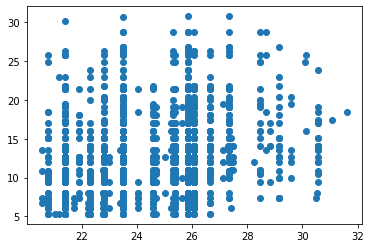

In [432]:
plt.scatter(priid*2,y_test)
plt.show()

I used simple neural network with three hidden layers and a output layer. I used relu activation function for the output layer. I used adam as the optimizer. The loss on on the test set is 24.965. 
From a above graph we can see that neural networks didnt predict well.

#### Final Conclusion:
#### Linear regression beging a simple model worked well on this data. As we can see the predicted values are very close to actual value.
##### Neural Networks didnot perform well maybe because of less number of obeservation and many number of categorical data

#### If I hade more time:
    
I can do better feature extaction using lasso regression as the features are not highly correlated.
I would also analyze each and every numerical data's distribution and would perform appropiate scaling.